## Data Preproccessing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import load_model

### how to run and import preproccessed data

There are 5846 rows and 3 columns
ham     4510
spam    1336
Name: Category, dtype: int64


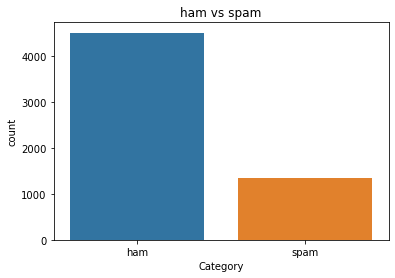

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
6      even brother like speak treat like aid patent      0
X_train: (4676,)


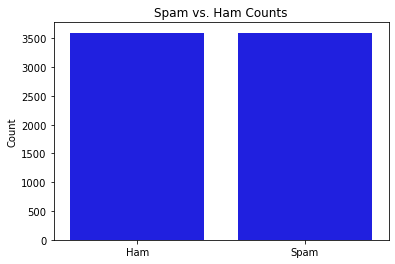

In [2]:
from utils import get_cleaned_data, generate_model_output
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()

### Neural Network with SGD optimizer

In [20]:
# model inspired from https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.optimizers import SGD

LR = .01
MOMENTUM = .05
#size of the output vector from each layer
embedding_vector_length = 32

lstm = tf.keras.Sequential()

lstm.add(Embedding(vocab_size, embedding_vector_length, input_length=sentence_len)) #embedding layer to vectorize
lstm.add(Bidirectional(tf.keras.layers.LSTM(64)))
lstm.add(Dense(16, activation='relu'))
lstm.add(Dropout(0.1)) #prevent overfitting
lstm.add(Dense(1, activation='sigmoid')) # normalize output

lstm.compile(loss='binary_crossentropy', optimizer= SGD(lr=LR, momentum=MOMENTUM), metrics=['accuracy'] )

print(lstm.summary())



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 32)           320000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
________________________________________________

C:\Users\cpere\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
BATCH_SIZE = 512
EPOCHS = 17

lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/17
15/15 [==============================] - 29s 2s/step - loss: 0.6928 - accuracy: 0.5607 - val_loss: 0.6912 - val_accuracy: 0.7581
Epoch 2/17
15/15 [==============================] - 30s 2s/step - loss: 0.6924 - accuracy: 0.5531 - val_loss: 0.6919 - val_accuracy: 0.6915
Epoch 3/17
15/15 [==============================] - 32s 2s/step - loss: 0.6921 - accuracy: 0.6123 - val_loss: 0.6906 - val_accuracy: 0.7786
Epoch 4/17
15/15 [==============================] - 32s 2s/step - loss: 0.6919 - accuracy: 0.5904 - val_loss: 0.6896 - val_accuracy: 0.7846
Epoch 5/17
15/15 [==============================] - 32s 2s/step - loss: 0.6915 - accuracy: 0.5428 - val_loss: 0.6885 - val_accuracy: 0.7872
Epoch 6/17
15/15 [==============================] - 33s 2s/step - loss: 0.6912 - accuracy: 0.5539 - val_loss: 0.6878 - val_accuracy: 0.7846
Epoch 7/17
15/15 [==============================] - 33s 2s/step - loss: 0.6910 - accuracy: 0.5361 - val_loss: 0.6869 - val_accuracy: 0.7803
Epoch 8/17
15/15 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


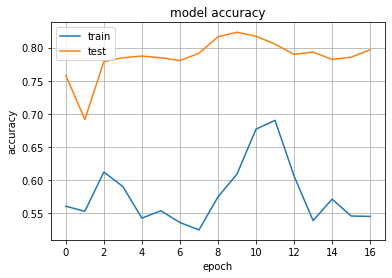

In [22]:
# plot model accuracy
print(lstm.history.history.keys())
plt.plot(lstm.history.history['accuracy'])
plt.plot(lstm.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [23]:
# test our model
y_pred=lstm.predict(X_test)
y_pred=(y_pred>0.5) # assign true(spam) if > .5

37/37 [==============================] - 2s 39ms/step


Classification Report
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       911
           1       0.72      0.13      0.22       259

    accuracy                           0.80      1170
   macro avg       0.76      0.56      0.55      1170
weighted avg       0.78      0.80      0.74      1170
 

Accuracy Score: 0.7965811965811965


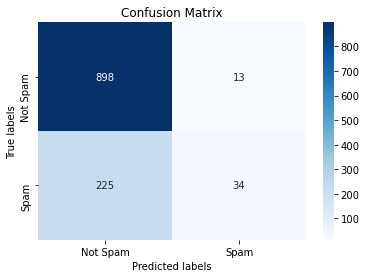

In [24]:
generate_model_output(y_test,y_pred)

### Neural Network with adam optimizer

In [14]:
from keras.layers import Dense, Embedding, Dropout
from keras.layers import Bidirectional

#size of the output vector from each layer
embedding_vector_length = 32

lstm = tf.keras.Sequential()

lstm.add(Embedding(vocab_size, embedding_vector_length, input_length=sentence_len)) #embedding layer to vectorize
lstm.add(Bidirectional(tf.keras.layers.LSTM(64)))
lstm.add(Dense(16, activation='relu'))
lstm.add(Dropout(0.1)) #prevent overfitting
lstm.add(Dense(1, activation='sigmoid')) # normalize output

lstm.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'] )

print(lstm.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           320000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
________________________________________________

In [15]:
BATCH_SIZE = 512
EPOCHS = 26

lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/26
15/15 [==============================] - 33s 2s/step - loss: 0.6762 - accuracy: 0.7380 - val_loss: 0.5647 - val_accuracy: 0.8803
Epoch 2/26
15/15 [==============================] - 26s 2s/step - loss: 0.5086 - accuracy: 0.8145 - val_loss: 0.2526 - val_accuracy: 0.9197
Epoch 3/26
15/15 [==============================] - 28s 2s/step - loss: 0.3037 - accuracy: 0.8844 - val_loss: 0.2277 - val_accuracy: 0.9137
Epoch 4/26
15/15 [==============================] - 28s 2s/step - loss: 0.2155 - accuracy: 0.9278 - val_loss: 0.1397 - val_accuracy: 0.9573
Epoch 5/26
15/15 [==============================] - 28s 2s/step - loss: 0.1432 - accuracy: 0.9542 - val_loss: 0.0900 - val_accuracy: 0.9709
Epoch 6/26
15/15 [==============================] - 29s 2s/step - loss: 0.0990 - accuracy: 0.9686 - val_loss: 0.0503 - val_accuracy: 0.9863
Epoch 7/26
15/15 [==============================] - 28s 2s/step - loss: 0.0902 - accuracy: 0.9705 - val_loss: 0.1652 - val_accuracy: 0.9513
Epoch 8/26
15/15 [==

In [16]:
# save model 
lstm.save('lstmModel.h5')
print('Model Saved!')
 
# load model
savedModel=load_model('lstmModel.h5')
savedModel.summary()

Model Saved!
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           320000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
___________________________________

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


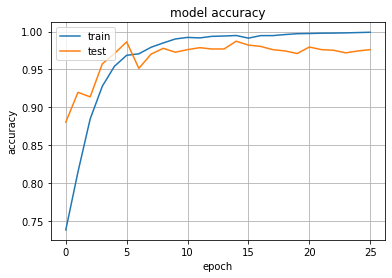

In [17]:
# plot model accuracy
print(lstm.history.history.keys())
plt.plot(lstm.history.history['accuracy'])
plt.plot(lstm.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [18]:
# test our model
y_pred=lstm.predict(X_test)
y_pred=(y_pred>0.5) # assign true(spam) if > .5

37/37 [==============================] - 2s 30ms/step


Classification Report
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       911
           1       0.91      1.00      0.95       259

    accuracy                           0.98      1170
   macro avg       0.95      0.98      0.97      1170
weighted avg       0.98      0.98      0.98      1170
 

Accuracy Score: 0.976068376068376


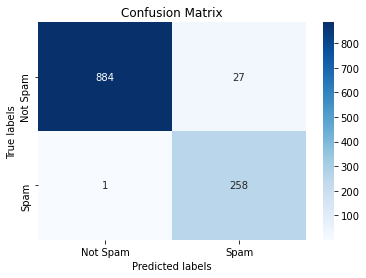

In [19]:
generate_model_output(y_test,y_pred)